In [24]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_28416/2729461129.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Create data and Plot

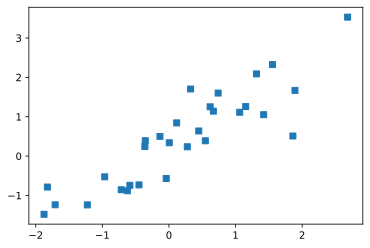

In [25]:
N = 30
x = torch.randn(N, 1) # 30 random numbers
y = x + torch.randn(N, 1) / 2

plt.plot(x, y, 's')
plt.show()

# Build model

In [26]:
ANN_reg = nn.Sequential(    # Object containing the model
    nn.Linear(1, 1),        # Input layer|Number of input, number of output
    nn.ReLU(),              # Non-linear Activation Function
    nn.Linear(1, 1)         # Output layer|Prediction of model
)

ANN_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [27]:
# Learning rate
learning_rate = 0.05

# Loss function | The object that implements the MSE loss function
loss_func = nn.MSELoss()

# Optimizer (the flavor of gradient descent to implement) | Stochastic GD
optimizer = torch.optim.SGD(params=ANN_reg.parameters(), lr=learning_rate)

# Train the model

In [28]:
num_epochs  = 500
losses      = torch.zeros(num_epochs)

for epoch in range(num_epochs):
  # Forward pass -> Output (prediction) of the model
  y_hat = ANN_reg(x)
  # Compute loss
  loss          = loss_func(y_hat, y)
  losses[epoch] = loss
  # Backprop
  optimizer.zero_grad() # Set all the derivative in the model to be zero
  loss.backward()       # Implement back prop based on the loss computed
  optimizer.step() 

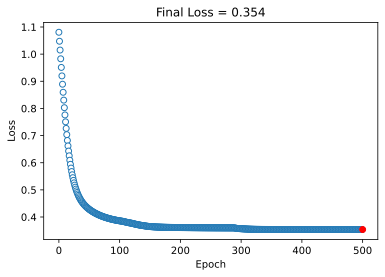

In [29]:
# Show the losses

# Manually compute losses
# Final forward pass
predictions = ANN_reg(x)

# Final loss (MSE)
test_loss = (predictions - y).pow(2).mean()

# `detach()`: detach the number from all other information
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(num_epochs, test_loss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Final Loss = {np.round(test_loss.item(), 3)}')
plt.show()

In [30]:
test_loss.item()

0.35394975543022156

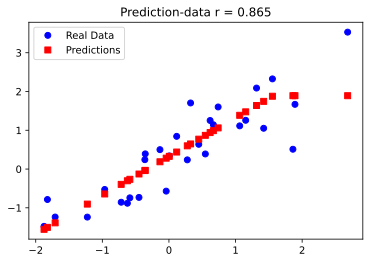

In [31]:
# Plot the data
plt.plot(x, y,                    'bo', label='Real Data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
# Correlation coefficient between the observed data and the predicted data
plt.title(f'Prediction-data r = {np.corrcoef(y.T, predictions.detach().T)[0, 1]:.3f}')
plt.legend()
plt.show()

# Additional explorations
1) How much data is "enough"? Try different values of N and see how low the loss gets. 
   Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?

2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
   by changing the division ("/2") when creating y as x+randn.

3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
   into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
   Then count the number of times the model had a loss>.25.